***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [2.x Further reading and references](2_x_further_reading_and_references.ipynb)
    * Next: [3. Positional Astronomy](3_0_introduction.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
#HTML('../style/course.css') #apply general CSS
HTML('../style/code_toggle.html')

Import section specific modules:

In [2]:
pass

## 2.y. Exercises<a id='math:sec:exercises'></a><!--\label{math:sec:exercises}-->

We provide a small set of exercises suitable for an interferometry course.

### 2.y.1. Fourier transforms and convolution: Fourier transform of the triangle function<a id='math:sec:exercises_fourier_triangle'></a><!--\label{math:sec:exercises_fourier_triangle}-->

Consider the triangle function given below.

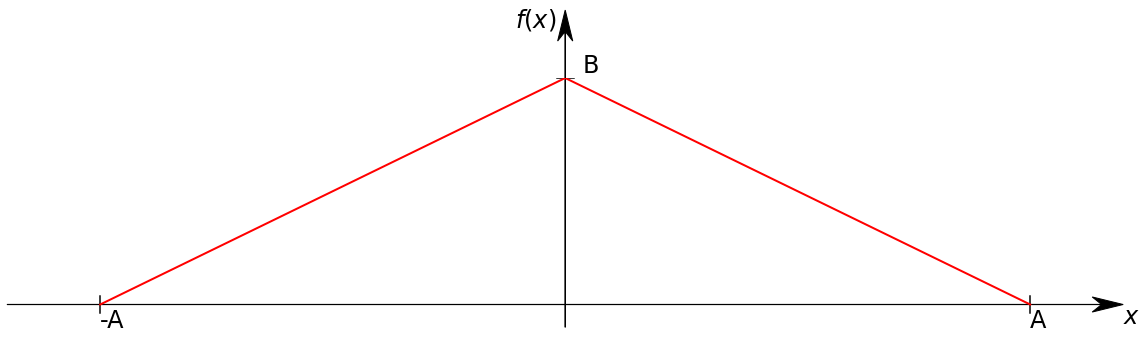

In [3]:
def plotviewgraph(fig, ax, xmin = 0, xmax = 1., ymin = 0., ymax = 1.):
    """
    Prepare a viewvgraph for plotting a function
    
    Parameters:
    fig:          Matplotlib figure
    ax:           Matplotlib subplot
    xmin (float): Minimum of range
    xmax (float): Maximum of range
    ymin (float): Minimum of function
    ymax (float): Maximum of function

    return: axis and vertical and horizontal tick length
    """
    
    # Axis ranges
    ax.axis([xmin-0.1*(xmax-xmin), xmax+0.1*(xmax-xmin), -0.2*(ymax-ymin), ymax])
    ax.axis('off')

    # get width and height of axes object to compute, see https://3diagramsperpage.wordpress.com/2014/05/25/arrowheads-for-axis-in-matplotlib/

    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height
 
    # manual arrowhead width and length
    hw = 1./15.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang
 
    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # Draw arrows
    ax.arrow(xmin-0.1*(xmax-xmin),0, 1.2*(xmax-xmin),0, fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
    ax.arrow(0,ymin-0.1*(ymax-ymin), 0., 1.4*(ymax-ymin), fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
    
    # Draw ticks for A, -A, and B
    twv = 0.01*height # vertical tick width
    twh = twv*(xmax-xmin)/(ymax-ymin)/ width*height
        
    return twv, twh

def plottriangle():
    
    A = 1.
    B = 1.
    
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure(figsize=(20,5))
    ax  = fig.add_subplot(111)
    
    twv, twh = plotviewgraph(fig, ax, xmin = -A, xmax = A, ymin = 0., ymax = B)
    
    ticx = [[-A,'-A'],[A,'A']]
    
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0], 0.-twh, tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
    ticy = [[B,'B']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.+twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'bottom', color = 'black')

    
    # Plot the function
    ax.plot([-A,0.,A],[0., B, 0.], 'r-', lw = 2)

    # Annotate axes
    ax.text(0.-twh, 1.2*(B), r'$f(x)$', fontsize = 24, horizontalalignment = 'right', verticalalignment = 'bottom', color = 'black')
    ax.text(1.2*B, 0., r'$x$', fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
    # Show amplitude
#    plt.annotate(s='', xy=(mu+2*sigma,0.), xytext=(mu+2*sigma,a), \
#                 arrowprops=dict(color = 'magenta', arrowstyle='<->'))
#    ax.text(mu+2*sigma+sigma/10., a/2, '$a$', fontsize = 12, horizontalalignment = 'left', \
#            verticalalignment = 'center', color = 'magenta')

    
plottriangle()
# <a id='math:fig:triangle'></a><!--\label{math:fig:triangle}-->

**Figure 2.y.1:** Triangle function with width $2A$ and amplitude $B$.<a id='math:fig:triangle'></a><!--\label{math:fig:triangle}-->

<b>Assignments:</b>
<ol type="A">
  <li>What can you tell about the complex part of the Fourier transform of $f$ using the symmetry of the function?</li>
  <li>Write down the function $f$ in two ways, once as a piece-wise defined function, once as a convolution of the rectangle function with itself.</li>
  <li>Calculate the Fourier transform, making use of expressing f as a convolution of a boxcar function with itself and using the convolution theorem.</li>
</ol>

#### 2.y.1.1 Fourier transform of the triangle function: example answer to assignment 1.<a id='math:sec:exercises_fourier_triangle_a'></a><!--\label{math:sec:exercises_fourier_triangle_a}-->

<b>What can you tell about the complex part and the symmetry of the Fourier transform of $f$ using the symmetry of the function?</b>

The function is real-valued ($f^*(x)\,=\,f(x)$) and even ($f(x)\,=\,f(-x)$), so it is Hermetian ($f^*(x)\,=\,f(-x)$, [see definition here &#10142;](2_4_the_fourier_transform.ipynb#math:sec:fourier_transforms_of_real_valued_and_hermetian_functions) <!--\ref{math:sec:fourier_transforms_of_real_valued_and_hermetian_functions}-->). According to [Sect. 2.4.6 &#10142;](2_4_the_fourier_transform.ipynb#math:sec:fourier_transforms_of_real_valued_and_hermetian_functions)<!--\ref{math:sec:fourier_transforms_of_real_valued_and_hermetian_functions}-->, this means that the Fourier transform is a <b>real-valued</b> function (because it is the Fourier transform of a Hermetian function) and also Hermetian (because it is the Fourier transform of a real-valued function). Hence it is also <b>even</b> ($f^*(x)\,=\,f(x) \,\land\, f^*(x)\,=\,f(-x)\,\Rightarrow\,f(x)\,=\,f(-x)$). Real-valued means that the complex part of $f$ is $0$.

#### 2.y.1.2 Fourier transform of the triangle function: example answer to assignment 2.<a id='math:sec:exercises_fourier_triangle_b'></a><!--\label{math:sec:exercises_fourier_triangle_b}-->

<b>Write down the function $f$ in two ways, once as a piece-wise defined function, once as a convolution of the rectangle function with itself.</b>

Part one is straightforward:

<a id='math:eq:y_001'></a><!--\label{math:eq:y_001}-->$$
\begin{align*}
f(x)   &= \left \{
     \begin{array}{lll}
    B-\frac{B}{A}|x| & {\rm for} & |x| \leq A\\
    0 & {\rm for} & |x| > A
\end{array}\right .
\end{align*}
$$

The solution to part two, using the definition as given in [Sect. 2.4.6 &#10142;](2_2_important_functions.ipynb#math:sec:boxcar_and_rectangle_function)<!--\ref{math:sec:boxcar_and_rectangle_function}-->

<a id='math:eq:y_002'></a><!--\label{math:eq:y_002}-->
$$
\begin{align*}
    f(x)   \,&=\,\frac{B}{A}\cdot  \Pi_{-\frac{A}{2},\frac{A}{2}}\circ \Pi_{-\frac{A}{2},\frac{A}{2}}(x)\\
&=\,\frac{B}{A}\cdot\Pi_A\circ \Pi_A\,\,\, {\rm , where} \,\,\,\Pi_A(x) \,=\,\Pi(\frac{x}{A})\\
\end{align*}
$$

requires a little calculation, but is straightforward. Using the [definition of the boxcar function &#10142;](2_2_important_functions.ipynb#math:sec:boxcar_and_rectangle_function) <!--\ref{math:sec:boxcar_and_rectangle_function}--> and the [definition of the convolution &#10142;](2_5_convolution.ipynb#math:sec:definition_of_the_convolution) <!--\ref{math:sec:definition_of_the_convolution}-->, one can see:

<a id='math:eq:y_003'></a><!--\label{math:eq:y_003}-->
$$
\begin{align*}
\Pi_{-\frac{A}{2},\frac{A}{2}}\circ \Pi_{-\frac{A}{2},\frac{A}{2}}(x)\,& =\,  \int_{-\infty}^{\infty}\Pi_{-\frac{A}{2},\frac{A}{2}}(t)\Pi_{-\frac{A}{2},\frac{A}{2}}(x-t)\,dt\\
& =\,  \int_{-\frac{A}{2}}^{\frac{A}{2}}\Pi_{-\frac{A}{2},\frac{A}{2}}(x-t)\,dt\\
& \underset{u\,=\,x-t}{=} \, \int_{u(-\frac{A}{2})}^{u(\frac{A}{2})}\Pi_{-\frac{A}{2},\frac{A}{2}}(u)\frac{dx}{du}\,du\\
& =\, \int_{x+\frac{A}{2}}^{x-\frac{A}{2}}\Pi_{-\frac{A}{2},\frac{A}{2}}(u)\cdot(-1)du\\
& =\, \int_{x-\frac{A}{2}}^{x+\frac{A}{2}}\Pi_{-\frac{A}{2},\frac{A}{2}}(u)du\\
\end{align*}
$$

and, accordingly

<a id='math:eq:y_004'></a><!--\label{math:eq:y_004}-->
\begin{align*}
|x| \,>\, A \,&\Rightarrow\,\Pi_{-\frac{A}{2},\frac{A}{2}}\circ \Pi_{-\frac{A}{2},\frac{A}{2}}(x)\, =\,  0\\
-A\,\leq\,x\,\leq 0\,&\Rightarrow \,\Pi_{-\frac{A}{2},\frac{A}{2}}\circ \Pi_{-\frac{A}{2},\frac{A}{2}}(x)\,=\,\int_{-\frac{A}{2}}^{x+\frac{A}{2}}du\,=\,A+x\\
0\,\leq\,x\,\leq A\,&\Rightarrow \,\Pi_{\frac{A}{2},\frac{A}{2}}\circ \Pi_{-\frac{A}{2},\frac{A}{2}}(x)\,=\,\int_{x-\frac{A}{2}}^{\frac{A}{2}}du\,=\,A-x\\
\end{align*}

This is identical to [above piece-wise definition &#10549;](2_y_exercises.ipynb#math:sec:math:eq:y_001).

#### 2.y.1.3 Fourier transform of the triangle function: example answer to assignment 3.<a id='math:sec:exercises_fourier_triangle_c'></a><!--\label{math:sec:exercises_fourier_triangle_c}-->

We know that ([convolution theorem &#10142;](2_7_fourier_theorems.ipynb#math:sec:convolution_theorem)<!--\ref{math:sec:convolution_theorem}-->, [similarity theorem &#10142;](2_7_fourier_theorems.ipynb#math:sec:similarity_theorem)<!--\ref{math:sec:similarity_theorem}-->, [definition of the triangle function &#10549;](#math:eq:y_002)<!--\ref{math:eq:y_002}-->, [Fourier transform of the rectangle boxcar function &#10142;](2_4_the_fourier_transform.ipynb#math:sec:fourier_transform_of_the_rectangle_and_the_sinc_function)<!--\ref{math:sec:convolution_theorem}-->):

<a id='math:eq:y_005'></a><!--\label{math:eq:y_005}-->$$
\begin{align*}
\mathscr{F}\{h\circ g\}\,&=\,\mathscr{F}\{h\}\cdot\mathscr{F}\{g\}\\
g\,=\,h(ax) \,&\Rightarrow\, \mathscr{F}\{g\}(s) = \frac{1}{|a|}\mathscr{F}\{h\}(\frac{s}{a})\\
f(x) \,&=\, \frac{B}{A}\Pi_A\circ\Pi_A(x)\\
\Pi_A(x)\,&=\,\Pi(\frac{x}{A})\\
\mathscr{F}\{\Pi\}(s) \,&=\,{\rm sinc}(s) \\
\end{align*}
$$

This makes our calculations a lot shorter.

<a id='math:eq:y_006'></a><!--\label{math:eq:y_006}-->$$
\begin{align*}
\mathscr{F}\{f\}(s)\,&=\,\mathscr{F}\{\frac{B}{A}\Pi_A\circ\Pi_A\}(s)\\
&=\,\frac{B}{A}\mathscr{F}\{\Pi_A\}(s)\cdot\mathscr{F}\{\Pi_A\}(s)\\
&=\,\frac{B}{A}\mathscr{F}\{A\Pi\}(As)\cdot\mathscr{F}\{A\Pi_A\}(As)\\
&=\,AB\,\mathscr{F}\{\Pi\}(As)\cdot\mathscr{F}\{\Pi\}(As)\\
&=\,AB\,{\rm sinc}(As)\cdot{\rm sinc}(As)\\
&=\,AB\,{\rm sinc}^2(As)\\
&=\,AB\,\frac{sin^2 A\pi s}{A^2\pi^2 s^2}\\
\end{align*}$$

So the solution looks like this:

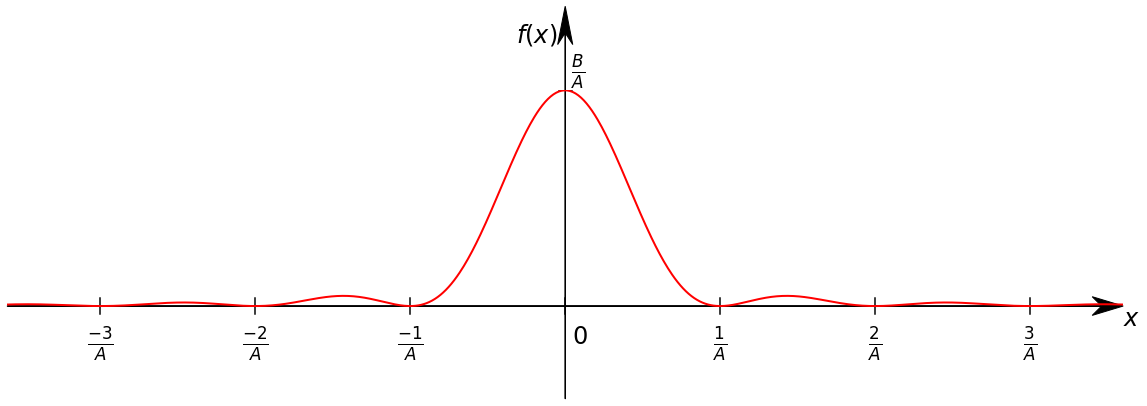

In [4]:
def plotfftriangle():
    
    A = 1.
    B = 1.
    
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure(figsize=(20,5))
    ax  = fig.add_subplot(111)

    
    twv, twh = plotviewgraph(fig, ax, xmin = -3./A, xmax = 3./A, ymin = -0.3, ymax = B)    
    ticx = [[-A,r'$-\frac{1}{A}$'],[A,'A']]
    
    ticx = [[-3.*A, r'$\frac{-3}{A}$'], [-2.*A, r'$\frac{-2}{A}$'], [-1./A, r'$\frac{-1}{A}$'], [1./A, r'$\frac{1}{A}$'], [2./A, r'$\frac{2}{A}$'], [3./A, r'$\frac{3}{A}$']]
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0], 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'center', verticalalignment = 'top', color = 'black')
    
    ticx = [[0.,r'$0$']]
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0]+twh, 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
    ticy = [[B,r'$\frac{B}{A}$']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.+twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'bottom', color = 'black')

    # Plot the function
    x = np.linspace(-4.*A, 4.*A, 900)
    y = np.power(np.sinc(x),2)

    # Annotate axes
    ax.text(0.-A/20, 1.2*(B), r'$f(x)$', fontsize = 24, horizontalalignment = 'right', verticalalignment = 'bottom', color = 'black')
    ax.text(1.2*3.*A, 0., r'$x$', fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
    ax.plot(x, y, 'r-', lw = 2)
        
plotfftriangle()
# <a id='math:fig:fftriangle'></a><!--\label{math:fig:fftriangle}-->

**Figure 2.y.2:** Triangle function with width $2A$ and amplitude $B$.<a id='math:fig:ft_of_triangle'></a><!--\label{math:fig:ft_of_triangle}-->

### 2.y.2. Fourier transforms and convolution: Convolution of two functions with finite support<a id='math:sec:exercises_convolution_of_two_functions_with_finite_support'></a><!--\label{math:sec:exercises_convolution_of_two_functions_with_finite_support}-->

Consider the two functions given below:

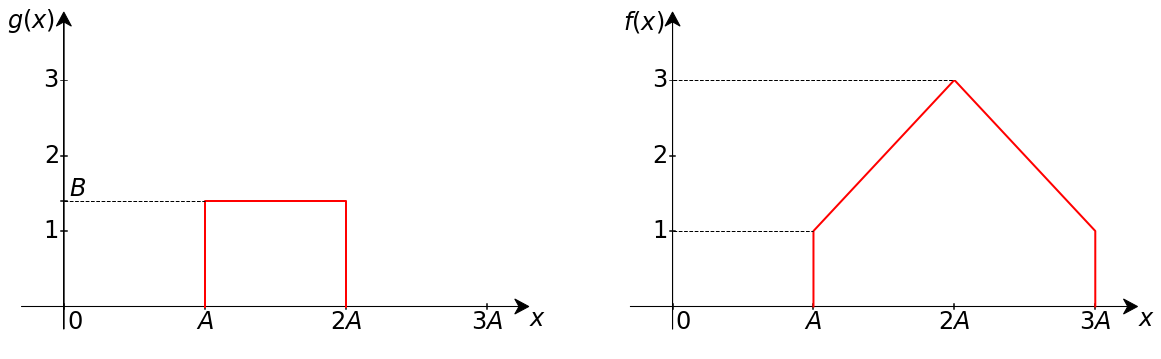

In [5]:
def plotrectntria():
    
    A = 1.
    B = 1.4
    
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure(figsize=(20,5))
    ax  = fig.add_subplot(121)
    
    twv, twh = plotviewgraph(fig, ax, xmin = 0., xmax = 3.*A, ymin = 0., ymax = 3.)    

    ticx = [[1.*A, r'$A$'], [2.*A, r'$2A$'], [3.*A, r'$3A$']]
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0], 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'center', verticalalignment = 'top', color = 'black')
    
    ticx = [[0.,r'$0$']]
    for tupel in ticx:
        ax.plot([-tupel[0],-tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0]+twh, 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
    ticy = [[1,r'$1$'], [2.,r'$2$'], [3.,r'$3$']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.-twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'right', verticalalignment = 'center', color = 'black')

    ticy = [[B, r'$B$']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.+twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'bottom', color = 'black')

        # Plot the function
    x = [A, A, 2*A, 2*A]
    y = [0., B, B, 0.]
    ax.plot(x, y, 'r-', lw = 2)

    x = [0., A]
    y = [B, B]
    ax.plot(x, y, 'k--', lw = 1)

    # Annotate axes
    ax.text(0.-3.*twh, 1.2*3., r'$g(x)$', fontsize = 24, horizontalalignment = 'right', verticalalignment = 'bottom', color = 'black')
    ax.text(1.1*3.*A, 0., r'$x$', fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
    ###################
    
    ax  = fig.add_subplot(122)

    twv, twh = plotviewgraph(fig, ax, xmin = 0., xmax = 3.*A, ymin = 0., ymax = 3.)    

    ticx = [[1.*A, r'$A$'], [2.*A, r'$2A$'], [3.*A, r'$3A$']]
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0], 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'center', verticalalignment = 'top', color = 'black')
    
    ticx = [[0.,r'$0$']]
    for tupel in ticx:
        ax.plot([-tupel[0],-tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0]+twh, 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
    ticy = [[1,r'$1$'], [2.,r'$2$'], [3.,r'$3$']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.-twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'right', verticalalignment = 'center', color = 'black')


        # Plot the function
    x = [A, A, 2*A, 3*A, 3*A]
    y = [0., 1., 3., 1., 0.]
    ax.plot(x, y, 'r-', lw = 2)

    x = [0., A]
    y = [1., 1.]
    ax.plot(x, y, 'k--', lw = 1)

    x = [0., 2*A]
    y = [3., 3.]
    ax.plot(x, y, 'k--', lw = 1)

    # Annotate axes
    ax.text(0.-3.*twh, 1.2*3., r'$f(x)$', fontsize = 24, horizontalalignment = 'right', verticalalignment = 'bottom', color = 'black')
    ax.text(1.1*3.*A, 0., r'$x$', fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

plotrectntria()
# <a id='math:fig:two_fs_with_finite_support'></a><!--\label{math:fig:two_fs_with_finite_support}-->

**Figure 2.y.3:** Triangle function with width $2A$ and amplitude $B$.<a id='math:fig:two_fs_with_finite_support'></a><!--\label{math:fig:two_fs_with_finite_support}-->

<b>Assignments:</b>
<ol type="A">
  <li>Write down the functions g and h.</li>
  <li>Calculate their convolution.</li>
</ol>

#### 2.y.2.1 Convolution of two functions with finite support: example answer to assignment 1.<a id='math:sec:exercises_convolution_of_two_functions_with_finite_support_a'></a><!--\label{math:sec:exercises_convolution_of_two_functions_with_finite_support_a}-->

<b>Write down the functions g and h.</b>

<a id='math:eq:y_007'></a><!--\label{math:eq:y_007}-->$$
\begin{align*}
h(x)   &= \left \{
     \begin{array}{lll}
    B & {\rm for} & A \leq x \leq 2A\\
    0 & {\rm else}
\end{array}\right .\\
g(x)   &= \left \{
     \begin{array}{lll}
    g_1(x)\,=\,\frac{2}{A}\left(x-\frac{A}{2}\right) & {\rm for} & A \leq x \leq 2A\\
    g_2(x)\,=\,-\frac{2}{A}\left(x-\frac{7A}{2}\right) & {\rm for} & 2A \leq x \leq 3A\\
    0 & {\rm else}
\end{array}\right .\\
\end{align*}
$$

#### 2.y.2.2 Convolution of two functions with finite support: example answer to assignment 2.<a id='math:sec:exercises_convolution_of_two_functions_with_finite_support_b'></a><!--\label{math:sec:exercises_convolution_of_two_functions_with_finite_support_b}-->

We have to evaluate the integral (see [definition of the convolution &#10142;](2_5_convolution.ipynb#math:sec:definition_of_the_convolution) <!--\ref{math:sec:definition_of_the_convolution}-->):

<a id='math:eq:y_008'></a><!--\label{math:eq:y_008}-->$$
g\circ h(x) \, = \, \int_{-\infty}^{\infty}g(x-t)h(t)\,dt
$$

To do so, we calculate the integral for ranges of $x$, depending on the supports (ranges where the function in non-zero) of $g(x-t)$ and $h(t)$, or $h_1(t)$ and $g_2(t)$ respectively.

As an aid, rewrite [above functions &#10549;](#math:eq:y_008)<!--\ref{math:eq:y_008}-->:

<a id='math:eq:y_009'></a><!--\label{math:eq:y_009}-->$$
\begin{align*}
g(x-t)   &= \left \{
     \begin{array}{lll}
    B & {\rm for} & -2A+x \leq t \leq -A+x\\
    0 & {\rm else}
\end{array}\right .\\
h(t)   &= \left \{
     \begin{array}{lll}
    h_1(t)\,=\,\frac{2}{A}\left(t-\frac{A}{2}\right) & {\rm for} & A \leq t \leq 2A\\
    h_2(t)\,=\,-\frac{2}{A}\left(t-\frac{7A}{2}\right) & {\rm for} & 2A \leq t \leq 3A\\
    0 & {\rm else}
\end{array}\right .\\
\end{align*}
$$

Case 1:

<a id='math:eq:y_010'></a><!--\label{math:eq:y_010}-->$$
\begin{align*}
x \,&<\, 2A\qquad\,\Rightarrow\\
g\circ h(x) \, &= \, \int_{-\infty}^{A}g(x-t)h(t)\,dt\\
&=\, 0
\end{align*}
$$

Case 2:

<a id='math:eq:y_011'></a><!--\label{math:eq:y_011}-->$$
\begin{align*}
2A \,&\leq x \,<\, 3A\qquad\Rightarrow\\
g\circ h(x) \, &= \, \int_{-\infty}^{\infty}g(x-t)h(t)\,dt\\
&=\, \int_{A}^{x-A}B\,h_1(t)\,dt\,\\
&=\,\int_{A}^{x-A}\frac{2B}{A}\left(t-\frac{A}{2}\right)\,dt\\
&=\,\frac{B}{A}\left(x^2-3Ax+2A^2\right)\\
\end{align*}$$

Case 3:

<a id='math:eq:y_012'></a><!--\label{math:eq:y_012}-->$$
\begin{align*}
3A \,&\leq\, x \,<\, 4A\qquad\Rightarrow\\
g\circ h(x) \, &=\, \int_{x-2A}^{2A}B\,h_1(t)\,dt+ \int_{2A}^{x-A}B\,h_2(t)\,dt\\
&=\,\int_{x-2A}^{2A}\frac{2B}{A}\left(t-\frac{A}{2}\right)\,dt- \int_{2A}^{x-A}\frac{2B}{A}\left(t-\frac{7A}{2}\right)\,dt\\
&=\,\frac{B}{A}\left(-2x^2+14Ax-22A^2\right)\\
\end{align*}
$$

Case 4:

<a id='math:eq:y_013'></a><!--\label{math:eq:y_013}-->$$
\begin{align*}
4A \,&\leq x \,<\, 5A\qquad\Rightarrow\\
g\circ h(x) \, &=\, \int_{x-2A}^{3A}B\,h_2(t)\,dt\,=\,\int_{x-2A}^{3A}-\frac{2B}{A}\left(t-\frac{7A}{2}\right)\,dt\\
&=\,\frac{B}{A}\left(x^2-11Ax+30A^2\right)\\
\end{align*}
$$

Case 5:

<a id='math:eq:y_014'></a><!--\label{math:eq:y_014}-->$$
\begin{align*}
5A&\,\leq\,x\qquad\,\Rightarrow\\
g\circ h(x) \, &= \, \int_{3A}^{\infty}g(x-t)h(t)\,dt\\
&=\, 0
\end{align*}
$$

Summarising, the convolution of g and h results in the following composite function:

<a id='math:eq:y_014'></a><!--\label{math:eq:y_014}-->$$
\begin{align*}
g\circ h(x) \, &=      
 \frac{B}{A}\left\{\begin{array}{lll}
    0 & {\rm for} & x < 2A \\
   x^2-3Ax+2A^2 & {\rm for} & 2A \leq x < 3A\\
   -2x^2+14Ax-22A^2 & {\rm for} & 3A \leq x < 4A\\
   x^2-11Ax+30A^2 & {\rm for} & 4A \leq x < 5A\\
    0 & {\rm for} & 5A \leq x \\
\end{array}\right .\\
\end{align*}$$

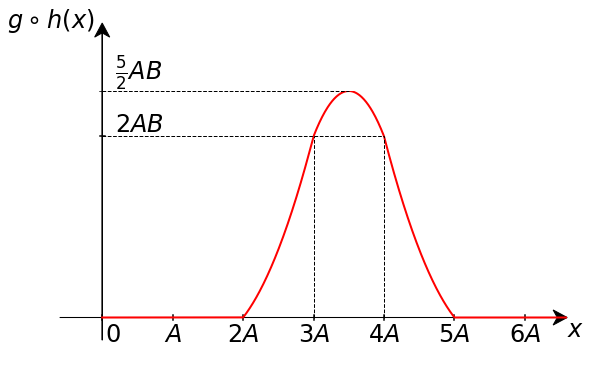

In [6]:
def rectntriaconv(A,B,x):
    
    xn = x[x < (2*A)]
    yn = xn*0.
    y = yn
    
    xn = x[(x == 2*A) | (x > 2*A) & (x < 3*A)]
    yn = (B/A)*(np.power(xn,2)-3*A*xn+2*np.power(A,2))
    y = np.append(y,yn)
        
    xn = x[(x == 3*A) | (x > 3*A) & (x < 4*A)]
    yn = (B/A)*((-2*np.power(xn,2))+14*A*xn-22*np.power(A,2))
    y = np.append(y,yn)
        
    xn = x[(x == 4*A) | (x > 4*A) & (x < 5*A)]
    yn = (B/A)*(np.power(xn,2)-11*A*xn+30*np.power(A,2))
    y = np.append(y,yn)
        
    xn = x[(x == 5*A) | (x > 5*A)]
    yn = xn*0.
    y = np.append(y,yn)

    return y

def plotrectntriaconv():
    A = 1.
    B = 1.4
    
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure(figsize=(20,5))
    ax  = fig.add_subplot(121)
    
    twv, twh = plotviewgraph(fig, ax, xmin = 0., xmax = 6.*A, ymin = 0., ymax = 2.5*A*B)    

    ticx = [[1.*A, r'$A$'], [2.*A, r'$2A$'], [3.*A, r'$3A$'], [4.*A, r'$4A$'], [5.*A, r'$5A$'], [6.*A, r'$6A$']]
    for tupel in ticx:
        ax.plot([tupel[0],tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0], 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'center', verticalalignment = 'top', color = 'black')
    
    ticx = [[0.,r'$0$']]
    for tupel in ticx:
        ax.plot([-tupel[0],-tupel[0]],[-twv, twv], 'k-')
        ax.text(tupel[0]+twh, 0.-2.*twh, tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
    ticy = [[2*A*B, r'$2AB$'], [2.5*A*B, r'$\frac{5}{2}AB$']]
    for tupel in ticy:
        ax.plot([-twh, twh], [tupel[0], tupel[0]], 'k-')
        ax.text(0.+5*twv, tupel[0], tupel[1], fontsize = 24, horizontalalignment = 'left', verticalalignment = 'bottom', color = 'black')

    # Plot the function
    x = np.linspace(0., 7.*A, 900)
    y = rectntriaconv(A,B,x)
    ax.plot(x, y, 'r-', lw = 2)

    # Plot a few lines
    x = [0., 4*A]
    y = [2.*A*B, 2.*A*B]
    ax.plot(x, y, 'k--', lw = 1)

    x = [0., 3.5*A]
    y = [2.5*A*B, 2.5*A*B]
    ax.plot(x, y, 'k--', lw = 1)

    x = [3.*A, 3.*A]
    y = [0., 2.*A*B]
    ax.plot(x, y, 'k--', lw = 1)

    x = [4.*A, 4.*A]
    y = [0., 2.*A*B]
    ax.plot(x, y, 'k--', lw = 1)

    
    # Annotate axes
    ax.text(0.-3.*twh, 1.25*2.5*A*B, r'$g\circ h(x)$', fontsize = 24, horizontalalignment = 'right', verticalalignment = 'bottom', color = 'black')
    ax.text(1.1*6.*A, 0., r'$x$', fontsize = 24, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

plotrectntriaconv()
# <a id='math:fig:two_fs_wfs'></a><!--\label{math:fig:two_fs_wfs}-->

**Figure 2.2.3:** Convolution of the two functions g and h from [Fig. 2.y.3 &#10549;](#math:fig:two_fs_with_finite_support) .<!--\ref{math:fig:two_fs_with_finite_support}-->.

***

* Next: [3. Positional Astronomy](3_0_introduction.ipynb)